<a href="https://colab.research.google.com/github/Sandeeppasala/EVA4_S1/blob/master/torch_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 5
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(y[:10])

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(200, 200, 50, 50)

In [4]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

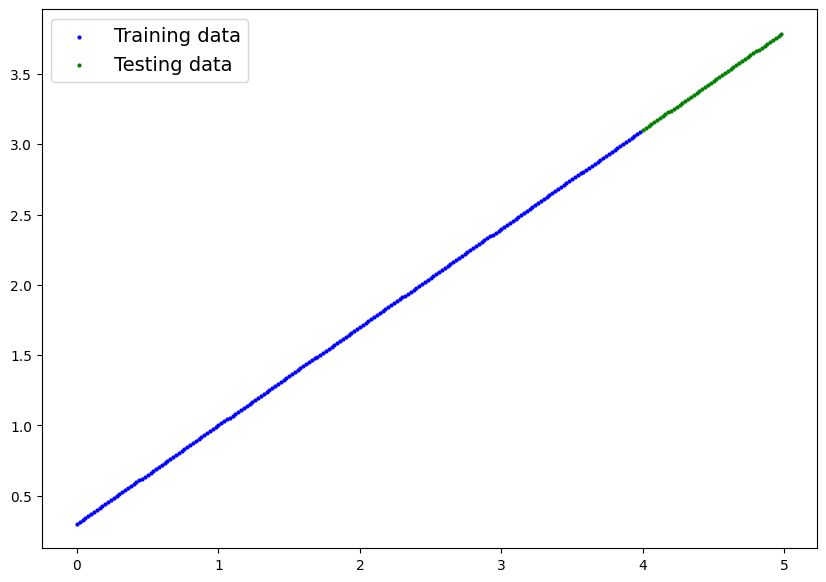

In [5]:
plot_predictions();

In [6]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [7]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [8]:
with torch.inference_mode():
  y_preds = model_0(X_test)
  #print(y_preds)

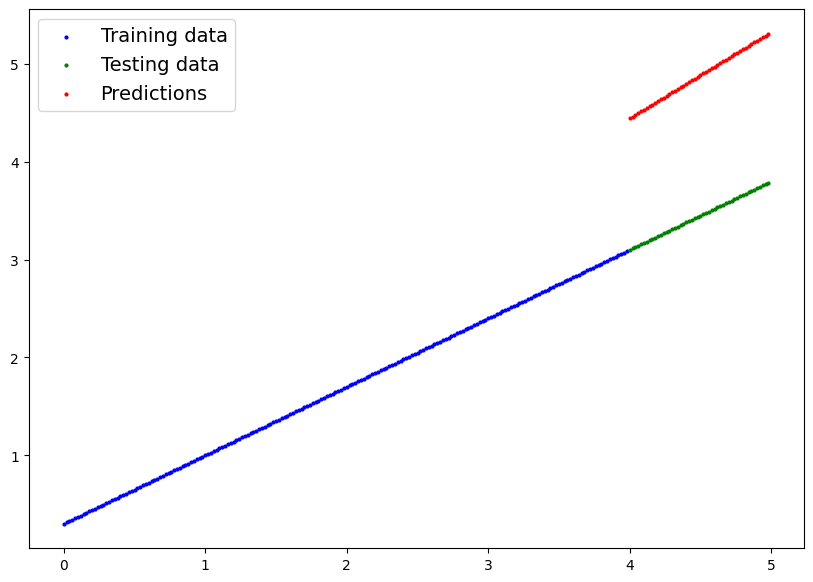

In [9]:
plot_predictions(predictions=y_preds)

In [10]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [11]:
torch.manual_seed(42)
epochs = 1000

train_loss_values = []
test_loss_values = []
epoch_count = []
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))
    if epoch % 100 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")



Epoch: 0 | MAE Train Loss: 0.9777199029922485 | MAE Test Loss: 1.334041953086853
Epoch: 100 | MAE Train Loss: 0.05715114250779152 | MAE Test Loss: 0.08692553639411926
Epoch: 200 | MAE Train Loss: 0.011776120401918888 | MAE Test Loss: 0.0852230042219162
Epoch: 300 | MAE Train Loss: 0.011776120401918888 | MAE Test Loss: 0.0852230042219162
Epoch: 400 | MAE Train Loss: 0.011776120401918888 | MAE Test Loss: 0.0852230042219162
Epoch: 500 | MAE Train Loss: 0.011776120401918888 | MAE Test Loss: 0.0852230042219162
Epoch: 600 | MAE Train Loss: 0.011776120401918888 | MAE Test Loss: 0.0852230042219162
Epoch: 700 | MAE Train Loss: 0.011776120401918888 | MAE Test Loss: 0.0852230042219162
Epoch: 800 | MAE Train Loss: 0.011776120401918888 | MAE Test Loss: 0.0852230042219162
Epoch: 900 | MAE Train Loss: 0.011776120401918888 | MAE Test Loss: 0.0852230042219162


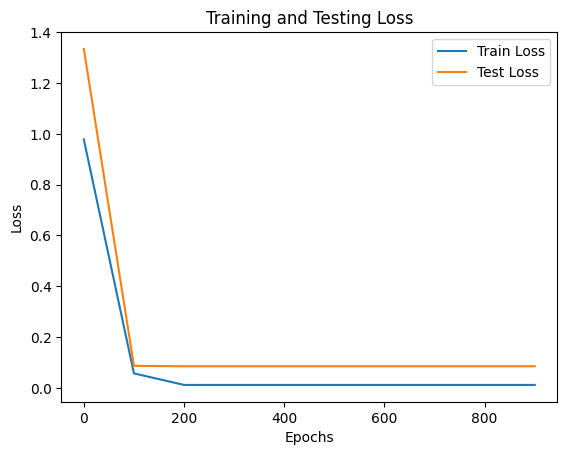

In [12]:
plt.plot(epoch_count, train_loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [13]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7009])), ('bias', tensor([0.3099]))])

In [14]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[3.1137],
        [3.1277],
        [3.1417],
        [3.1557],
        [3.1697],
        [3.1838],
        [3.1978],
        [3.2118],
        [3.2258],
        [3.2398],
        [3.2539],
        [3.2679],
        [3.2819],
        [3.2959],
        [3.3099],
        [3.3239],
        [3.3380],
        [3.3520],
        [3.3660],
        [3.3800],
        [3.3940],
        [3.4081],
        [3.4221],
        [3.4361],
        [3.4501],
        [3.4641],
        [3.4782],
        [3.4922],
        [3.5062],
        [3.5202],
        [3.5342],
        [3.5483],
        [3.5623],
        [3.5763],
        [3.5903],
        [3.6043],
        [3.6183],
        [3.6324],
        [3.6464],
        [3.6604],
        [3.6744],
        [3.6884],
        [3.7025],
        [3.7165],
        [3.7305],
        [3.7445],
        [3.7585],
        [3.7726],
        [3.7866],
        [3.8006]])

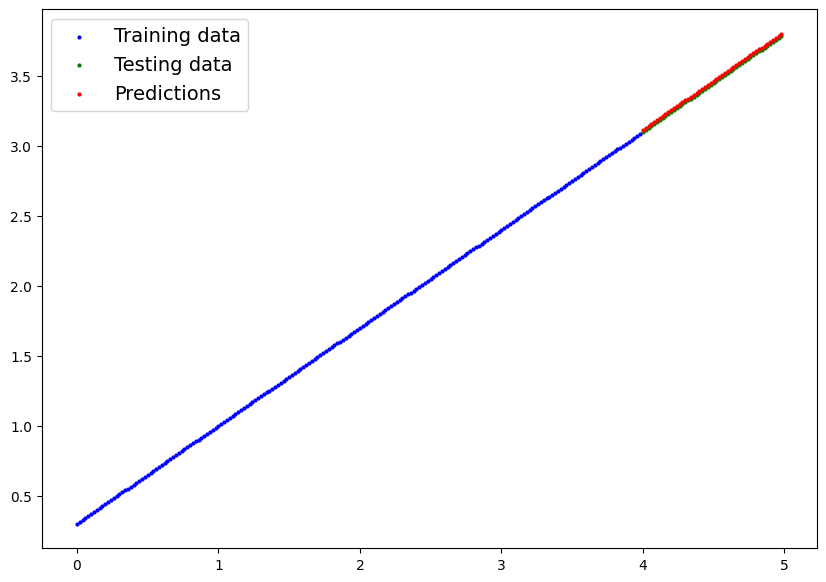

In [15]:
plot_predictions(predictions=y_preds)

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7009])), ('bias', tensor([0.3099]))])